In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset from Excel file
file_path = '/Real estate valuation data set.xlsx'  # Replace with the actual file path
df = pd.read_excel(file_path)

# Drop the ID column if it's not necessary for the model
df = df.drop('No', axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the new data
new_data = pd.DataFrame({'X1 transaction date':[2013],'X2 house age': [20], 'X3 distance to the nearest MRT station': [500],
                         'X4 number of convenience stores': [2], 'X5 latitude': [25.0],
                         'X6 longitude': [121.5]})

# Ensure that the new data has the same columns as the training data
new_data_scaled = scaler.transform(new_data[X_train.columns])

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Make predictions on new data
predictions = model.predict(new_data_scaled)
print(f'Predicted Price: {predictions[0][0]}')

Epoch 1/50
10/10 [==============================] - 1s 34ms/step - loss: 1596.8865 - mae: 37.7805 - val_loss: 2124.3987 - val_mae: 42.2318
Epoch 2/50
10/10 [==============================] - 0s 10ms/step - loss: 1557.0033 - mae: 37.2614 - val_loss: 2081.4094 - val_mae: 41.7185
Epoch 3/50
10/10 [==============================] - 0s 11ms/step - loss: 1515.9934 - mae: 36.7115 - val_loss: 2032.5167 - val_mae: 41.1323
Epoch 4/50
10/10 [==============================] - 0s 9ms/step - loss: 1466.3918 - mae: 36.0438 - val_loss: 1971.2760 - val_mae: 40.3864
Epoch 5/50
10/10 [==============================] - 0s 10ms/step - loss: 1403.1409 - mae: 35.1876 - val_loss: 1890.8604 - val_mae: 39.3869
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 1324.2266 - mae: 34.0802 - val_loss: 1787.1873 - val_mae: 38.0751
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 1226.8175 - mae: 32.6678 - val_loss: 1662.3462 - val_mae: 36.4480
Epoch 8/50
10/10 [==========

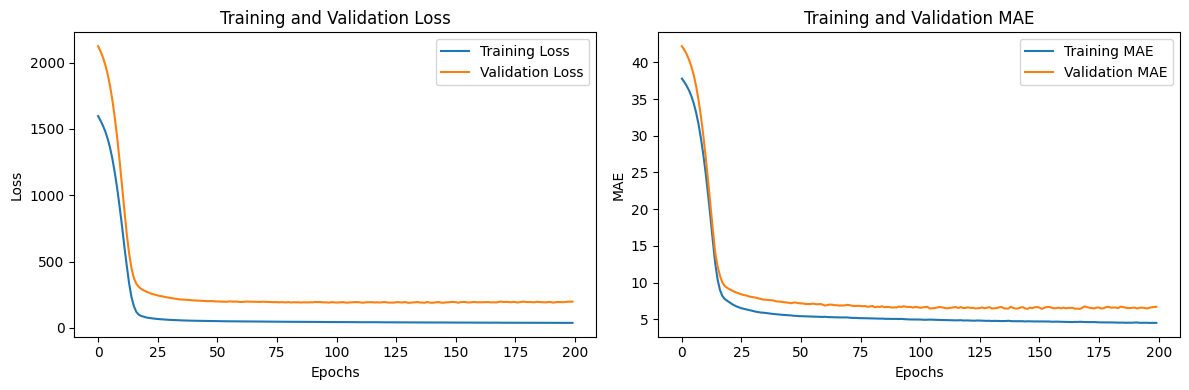

3/3 [==============================] - 0s 6ms/step - loss: 177380832.0000 - mae: 12751.0859
Mean Absolute Error on Test Set: 12751.0859375


In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset from Excel file
file_path = '/Real estate valuation data set.xlsx'
df = pd.read_excel(file_path)

# Drop the ID column if it's not necessary for the model
df = df.drop('No', axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=0)

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

Epoch 1/200
10/10 [==============================] - 1s 23ms/step - loss: 1612.8252 - mae: 38.0143 - val_loss: 2147.5288 - val_mae: 42.5296
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 1583.4646 - mae: 37.6252 - val_loss: 2113.9973 - val_mae: 42.1284
Epoch 3/200
10/10 [==============================] - 0s 10ms/step - loss: 1551.9351 - mae: 37.2139 - val_loss: 2073.7930 - val_mae: 41.6477
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 1514.5477 - mae: 36.7129 - val_loss: 2023.5885 - val_mae: 41.0498
Epoch 5/200
10/10 [==============================] - 0s 10ms/step - loss: 1467.2115 - mae: 36.0870 - val_loss: 1961.4508 - val_mae: 40.3049
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 1408.5585 - mae: 35.2915 - val_loss: 1883.4528 - val_mae: 39.3544
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: 1336.1178 - mae: 34.2970 - val_loss: 1787.5839 - val_mae: 38.1543
Epoch 8/200
10/10 [====

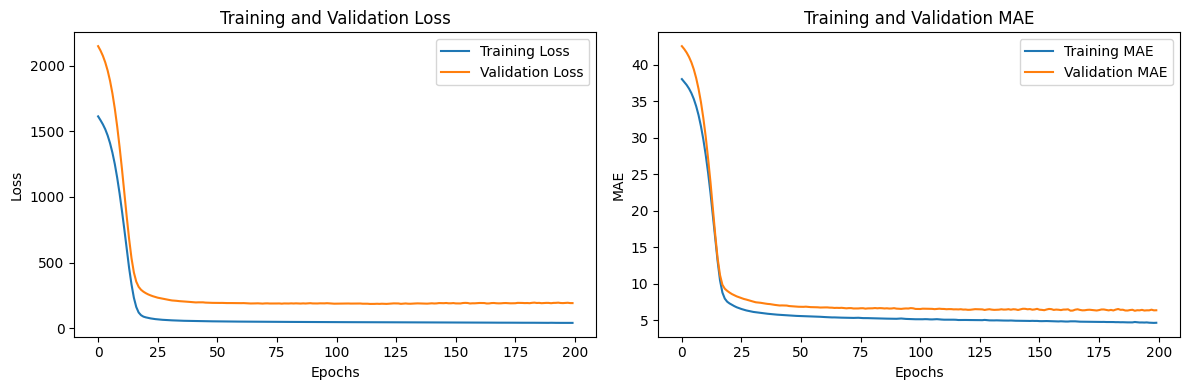

3/3 [==============================] - 0s 7ms/step - loss: 37.9787 - mae: 4.4219
Mean Absolute Error on Test Set: 4.421933650970459


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset from Excel file
file_path = '/Real estate valuation data set.xlsx'
df = pd.read_excel(file_path)

# Drop the ID column if it's not necessary for the model
df = df.drop('No', axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose=1)

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

model.save("/content/adv_model.h5")

In [16]:
!tensorflowjs_converter \
    --input_format=keras \
    adv_model.h5 \
    my_tfjs_model

2024-03-05 22:43:51.538914: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 22:43:51.538999: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 22:43:51.540795: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 22:43:53.070399: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 51.3 MB/s eta 0:00:00


Epoch 1/200
10/10 [==============================] - 1s 22ms/step - loss: 1571.8342 - mae: 37.4553 - val_loss: 2079.8699 - val_mae: 41.6732
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 1510.2874 - mae: 36.6035 - val_loss: 2000.3796 - val_mae: 40.6846
Epoch 3/200
10/10 [==============================] - 0s 6ms/step - loss: 1440.4237 - mae: 35.6202 - val_loss: 1896.4208 - val_mae: 39.3712
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 1336.0360 - mae: 34.1574 - val_loss: 1757.4948 - val_mae: 37.5585
Epoch 5/200
10/10 [==============================] - 0s 6ms/step - loss: 1200.4971 - mae: 32.1781 - val_loss: 1575.8525 - val_mae: 35.0885
Epoch 6/200
10/10 [==============================] - 0s 6ms/step - loss: 1038.0901 - mae: 29.6852 - val_loss: 1353.1243 - val_mae: 31.8379
Epoch 7/200
10/10 [==============================] - 0s 7ms/step - loss: 841.3946 - mae: 26.3499 - val_loss: 1093.0079 - val_mae: 27.8055
Epoch 8/200
10/10 [========

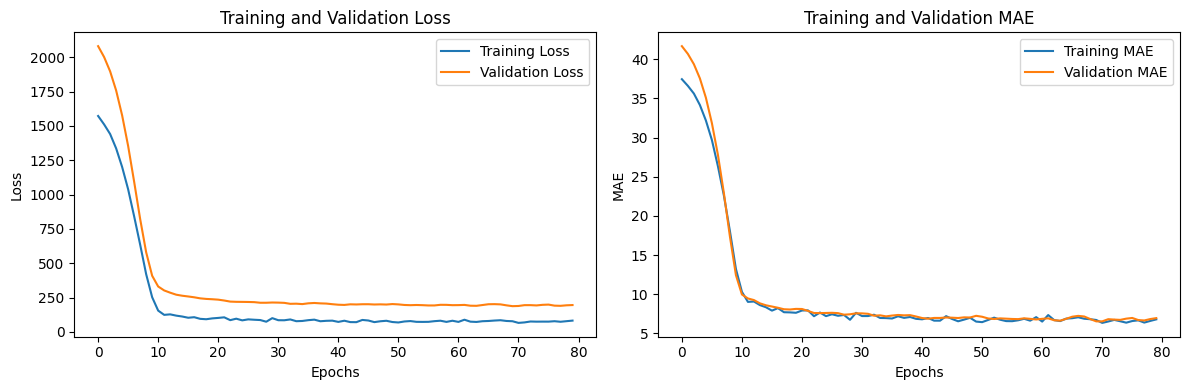

3/3 [==============================] - 0s 7ms/step - loss: 45.6276 - mae: 4.9973
Mean Absolute Error on Test Set: 4.997278213500977


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset from Excel file
file_path = '/Real estate valuation data set.xlsx'
df = pd.read_excel(file_path)

# Drop the ID column if it's not necessary for the model
df = df.drop('No', axis=1)

# Split the data into features (X) and target variable (y)
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Build the model with improved architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer and mean squared error loss
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

model.save("/content/house_model.h5")
